# Heart Disease Prediction

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

sns.set()
plt.style.use('ggplot')
%matplotlib inline

In [2]:
#import dataset
heart_df = pd.read_csv('./heart_data.csv')       
heart_df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [3]:
# information about the dataset
heart_df.info()     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  class     303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [4]:
#description about dataset
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,class
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [5]:
heart_df.shape

(303, 14)

In [12]:
heart_df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
class         int64
dtype: object

# Checking null values

In [6]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
class       0
dtype: int64

In [15]:
heart_df = heart_df[~heart_df.isin(['?'])]
heart_df = heart_df.dropna(axis=0)

In [16]:
heart_df.notnull().sum()

age         297
sex         297
cp          297
trestbps    297
chol        297
fbs         297
restecg     297
thalach     297
exang       297
oldpeak     297
slope       297
ca          297
thal        297
class       297
dtype: int64

In [17]:
heart_df = heart_df.apply(pd.to_numeric)
heart_df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
class         int64
dtype: object

# Exploratory Data Analysis(EDA)

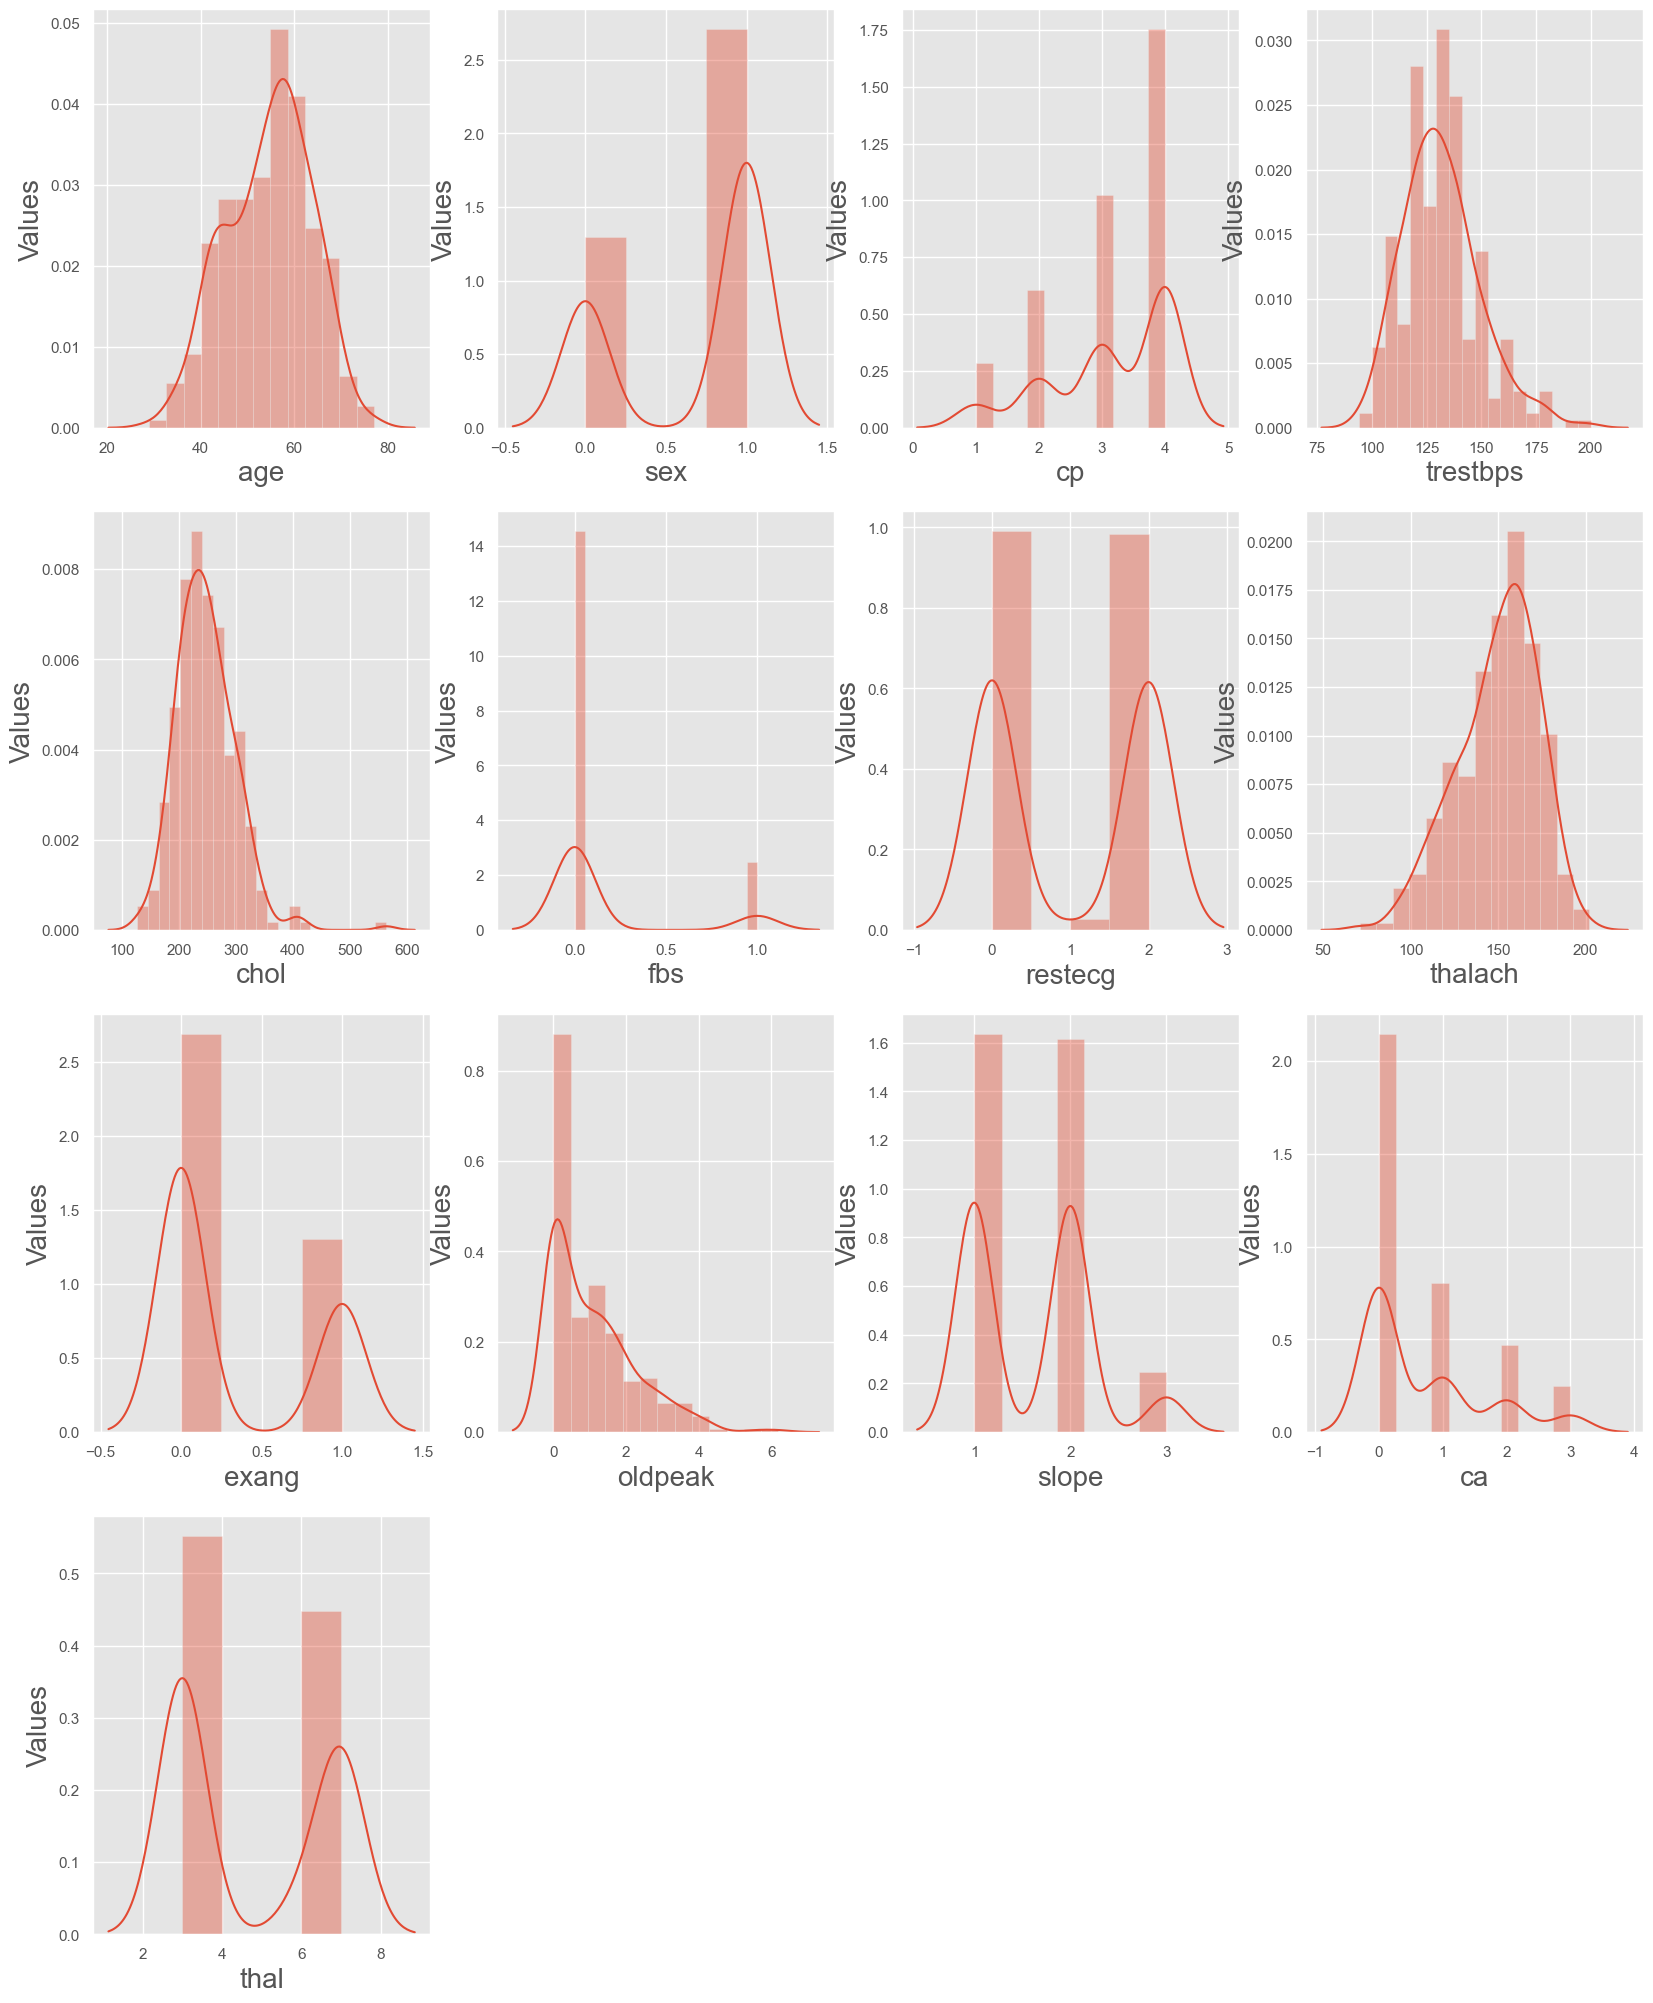

In [18]:
#Plotting the distribution plot.
plt.figure(figsize=(20,25))
plotnumber=1

for column in heart_df:
    if plotnumber<14:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(heart_df[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Values',fontsize=20)
    plotnumber+=1
plt.show()

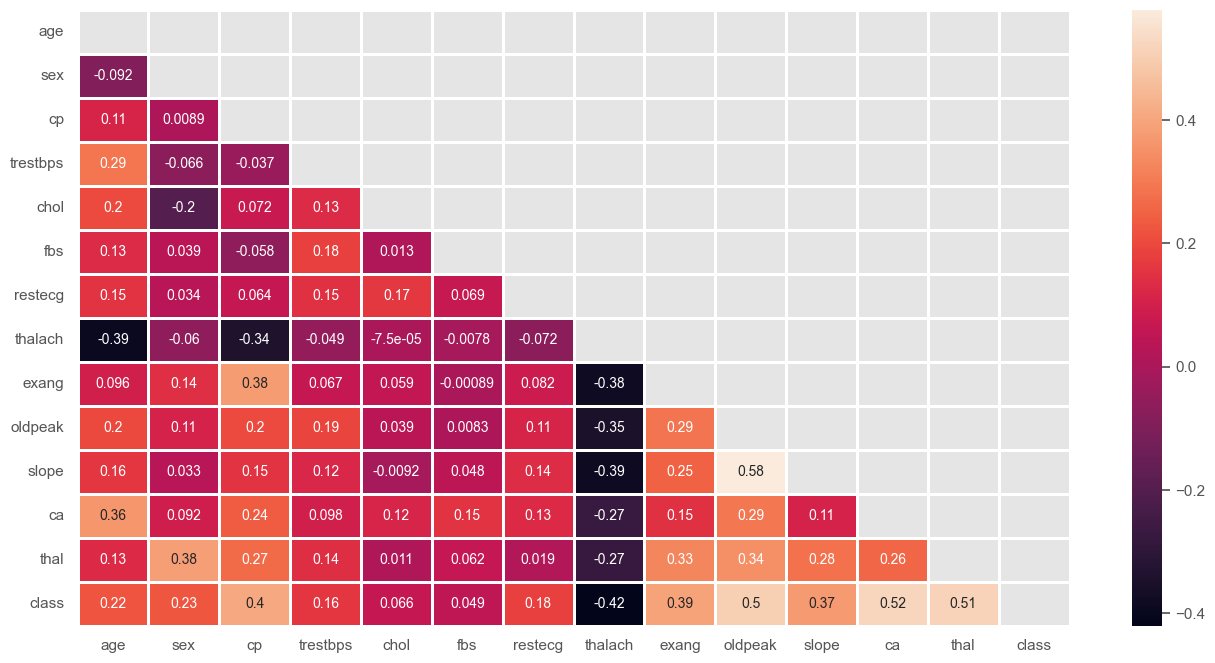

In [19]:
#Correlation matrix

plt.figure(figsize = (16, 8))

corr = heart_df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, annot = True, fmt = '.2g', linewidths = 1)
plt.show()

In [12]:
#checking the variance
heart_df.var()

age           82.306450
sex            0.211944
cp             1.060160
trestbps     306.835410
chol        2661.787109
fbs            0.127111
restecg        0.278655
thalach      529.263325
exang          0.223514
oldpeak        1.380750
slope          0.381622
ca             1.062544
thal           0.385219
target         0.250071
dtype: float64

In [20]:
heart_df.var()

age           81.897716
sex            0.219492
cp             0.930954
trestbps     315.517290
chol        2703.748589
fbs            0.124238
restecg        0.989853
thalach      526.315270
exang          0.220675
oldpeak        1.359842
slope          0.382155
ca             0.881654
thal           3.758281
class          1.524115
dtype: float64

We can see ,there is a huge variance.So,we should normalise it.

# Normalization

In [21]:
heart_df['trestbps']=np.log(heart_df['trestbps'])
heart_df['chol']=np.log(heart_df['chol'])
heart_df['thalach']=np.log(heart_df['thalach'])

np.var(heart_df[["trestbps",'chol','thalach']])

trestbps    0.017317
chol        0.041525
thalach     0.027169
dtype: float64

In [22]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
class       0
dtype: int64

In [25]:
x=heart_df.drop('class',axis=1)    
y=heart_df['class']

In [26]:
#spliting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.30, random_state=0)

In [27]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
dtypes: float64(13)
memory usage: 32.5 KB


# Logistic Regression

In [29]:
accuracies={}

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr = LogisticRegression(penalty='l2')
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

acc=accuracy_score(y_test,y_pred)
accuracies['LR']=acc*100
print("Training accuracy score of the model is:",accuracy_score(y_train, lr.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred)*100,"%")

Training accuracy score of the model is: 65.70048309178745 %
Testing accuracy score of the model is: 56.666666666666664 %


In [30]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred))

print("Classification Report",classification_report(y_test,y_pred))

Confusion matrix of the model [[45  1  2  0  0]
 [10  2  1  4  0]
 [ 1  0  2  6  1]
 [ 1  3  3  2  1]
 [ 1  1  2  1  0]]
Classification Report               precision    recall  f1-score   support

           0       0.78      0.94      0.85        48
           1       0.29      0.12      0.17        17
           2       0.20      0.20      0.20        10
           3       0.15      0.20      0.17        10
           4       0.00      0.00      0.00         5

    accuracy                           0.57        90
   macro avg       0.28      0.29      0.28        90
weighted avg       0.51      0.57      0.53        90



# KNearestNeighbors

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=8)

knn.fit(x_train,y_train)

y_pred1 = knn.predict(x_test)

acc1=accuracy_score(y_test,y_pred1)
accuracies['KNN']=acc1*100

print("Training accuracy score of the model is:",accuracy_score(y_train, knn.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred1)*100,"%")

Training accuracy score of the model is: 61.83574879227053 %
Testing accuracy score of the model is: 53.333333333333336 %


In [33]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred1))

print("Classification Report",classification_report(y_test,y_pred1))

Confusion matrix of the model [[44  3  1  0  0]
 [12  2  2  1  0]
 [ 4  3  0  3  0]
 [ 5  1  2  2  0]
 [ 3  0  0  2  0]]
Classification Report               precision    recall  f1-score   support

           0       0.65      0.92      0.76        48
           1       0.22      0.12      0.15        17
           2       0.00      0.00      0.00        10
           3       0.25      0.20      0.22        10
           4       0.00      0.00      0.00         5

    accuracy                           0.53        90
   macro avg       0.22      0.25      0.23        90
weighted avg       0.41      0.53      0.46        90



# SVM

In [34]:
from sklearn.svm import SVC

svc = SVC(probability=True)
svc.fit(x_train, y_train)

y_pred2 = svc.predict(x_test)

acc2=accuracy_score(y_test,y_pred2)
accuracies['SVM']=acc2*100

print("Training accuracy score of the model is:",accuracy_score(y_train, svc.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred2)*100,"%")

Training accuracy score of the model is: 54.106280193236714 %
Testing accuracy score of the model is: 53.333333333333336 %


In [35]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred2))

print("Classification Report",classification_report(y_test,y_pred2))

Confusion matrix of the model [[48  0  0  0  0]
 [17  0  0  0  0]
 [10  0  0  0  0]
 [10  0  0  0  0]
 [ 5  0  0  0  0]]
Classification Report               precision    recall  f1-score   support

           0       0.53      1.00      0.70        48
           1       0.00      0.00      0.00        17
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00         5

    accuracy                           0.53        90
   macro avg       0.11      0.20      0.14        90
weighted avg       0.28      0.53      0.37        90



# Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_pred3 = dtc.predict(x_test)

acc3=accuracy_score(y_test,y_pred3)
accuracies['DT']=acc3*100

print("Training accuracy score of the model is:",accuracy_score(y_train, dtc.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred3)*100,"%")

Training accuracy score of the model is: 100.0 %
Testing accuracy score of the model is: 45.55555555555556 %


In [37]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred3))

print("Classification Report",classification_report(y_test,y_pred3))

Confusion matrix of the model [[34  9  2  2  1]
 [ 5  6  2  2  2]
 [ 0  4  1  4  1]
 [ 1  3  4  0  2]
 [ 0  2  1  2  0]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.71      0.77        48
           1       0.25      0.35      0.29        17
           2       0.10      0.10      0.10        10
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00         5

    accuracy                           0.46        90
   macro avg       0.24      0.23      0.23        90
weighted avg       0.51      0.46      0.48        90



In [38]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(2, 32, 1),
    'min_samples_leaf' : range(1, 10, 1),
    'min_samples_split' : range(2, 10, 1),
    'splitter' : ['best', 'random']
}

grid_search = GridSearchCV(dtc, grid_params, cv = 10, n_jobs = -1, verbose = 1)
grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 8640 candidates, totalling 86400 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [39]:
grid_search.best_score_

0.6235714285714286

In [40]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 6,
 'min_samples_split': 4,
 'splitter': 'random'}

In [41]:
dtc2 = DecisionTreeClassifier(criterion= 'entropy', max_depth= 12, min_samples_leaf= 1, min_samples_split= 2, splitter= 'random')
dtc2.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=12, splitter='random')

In [42]:
y_pred4 = dtc2.predict(x_test)
acc4=accuracy_score(y_test,y_pred4)
accuracies['DT2']=acc4*100

print("Training accuracy score of the model is:",accuracy_score(y_train, dtc2.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred4)*100,"%")

Training accuracy score of the model is: 100.0 %
Testing accuracy score of the model is: 47.77777777777778 %


In [43]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred4))

print("Classification Report",classification_report(y_test,y_pred4))

Confusion matrix of the model [[32 10  5  1  0]
 [ 6  5  0  4  2]
 [ 2  5  1  2  0]
 [ 1  3  0  5  1]
 [ 1  3  1  0  0]]
Classification Report               precision    recall  f1-score   support

           0       0.76      0.67      0.71        48
           1       0.19      0.29      0.23        17
           2       0.14      0.10      0.12        10
           3       0.42      0.50      0.45        10
           4       0.00      0.00      0.00         5

    accuracy                           0.48        90
   macro avg       0.30      0.31      0.30        90
weighted avg       0.50      0.48      0.49        90



In [44]:
# update dictionary
accuracies['DT']=acc4*100
del accuracies['DT2']

# Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(criterion = 'gini', max_depth = 7, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 4, n_estimators = 180)
rfc.fit(x_train, y_train)

y_pred5 = rfc.predict(x_test)

acc5=accuracy_score(y_test,y_pred5)
accuracies['RF']=acc5*100

print("Training accuracy score of the model is:",accuracy_score(y_train, rfc.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred5)*100,"%")

Training accuracy score of the model is: 94.68599033816425 %
Testing accuracy score of the model is: 54.44444444444444 %


In [46]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred5))

print("Classification Report",classification_report(y_test,y_pred5))

Confusion matrix of the model [[45  3  0  0  0]
 [12  2  3  0  0]
 [ 4  1  1  4  0]
 [ 3  4  1  1  1]
 [ 2  1  2  0  0]]
Classification Report               precision    recall  f1-score   support

           0       0.68      0.94      0.79        48
           1       0.18      0.12      0.14        17
           2       0.14      0.10      0.12        10
           3       0.20      0.10      0.13        10
           4       0.00      0.00      0.00         5

    accuracy                           0.54        90
   macro avg       0.24      0.25      0.24        90
weighted avg       0.44      0.54      0.48        90



# Gradient Boosting

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

gbc = GradientBoostingClassifier(learning_rate = 0.05, loss = 'deviance', n_estimators = 180)
gbc.fit(x_train, y_train)

y_pred6 = gbc.predict(x_test)

acc6 = accuracy_score(y_test,y_pred6)
accuracies['GradientBoosting']=acc6*100

print("Training accuracy score of the model is:",accuracy_score(y_train, gbc.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred6)*100,"%")

InvalidParameterError: The 'loss' parameter of GradientBoostingClassifier must be a str among {'log_loss', 'exponential'}. Got 'deviance' instead.

# XGBoost

In [50]:
from xgboost import XGBClassifier 

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 5, n_estimators = 180)

xgb.fit(x_train, y_train)

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
y_pred7 = xgb.predict(x_test)

acc7=accuracy_score(y_test,y_pred7)

accuracies['XGBoost']=acc7*100
print("Training accuracy score of the model is:",accuracy_score(y_train, xgb.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred7)*100,"%")

In [ ]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred7))

print("Classification Report",classification_report(y_test,y_pred7))

In [ ]:
colors = ["purple", "green", "orange", "magenta","blue","black"]

# sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.yticks(np.arange(0,1200,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors )
plt.show()

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM',  'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XgBoost'],
    'Score': [acc, acc1, acc2, acc4, acc5, acc6, acc7]
})

models.sort_values(by = 'Score', ascending = False)

In [ ]:
import pickle
model = rfc
pickle.dump(model, open("models/heart.pkl",'wb'))

In [ ]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': lr,
},
{
    'label': 'DT',
    'model': dtc2,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rfc,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]
for m in models:
    model = m['model'] 
    model.fit(x_train, y_train) 
    y_pred=model.predict(x_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(x_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(x_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Heart Disease Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("outputs/roc_heart.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
models = [
{
    'label': 'LR',
    'model': lr,
},
{
    'label': 'DT',
    'model': dtc2,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rfc,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]

means_roc = []
means_accuracy = [100*round(acc,4), 100*round(acc4,4), 100*round(acc2,4), 100*round(acc1,4), 100*round(acc7,4), 
                  100*round(acc5,4), 100*round(acc6,4)]

for m in models:
    model = m['model'] 
    model.fit(x_train, y_train) 
    y_pred=model.predict(x_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(x_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(x_test))
    auc = 100*round(auc,4)
    means_roc.append(auc)

print(means_accuracy)
print(means_roc)

# data to plot
n_groups = 7
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

# create plot
fig, ax = plt.subplots(figsize=(8,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width,
alpha=opacity,
color='mediumpurple',
label='Accuracy (%)')

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
alpha=opacity,
color='rebeccapurple',
label='ROC (%)')

plt.xlim([-1, 8])
plt.ylim([70, 105])

plt.title('Performance Evaluation - Heart Disease Prediction', fontsize=12)
plt.xticks(index, ('   LR', '   DT', '   SVM', '   KNN', 'XGBoost' , '   RF', '   GBDT'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.savefig("outputs/PE_heart.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()